###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth.

# Coding Assignment: Rocket

The equations of motion for a rocket in purely vertical flight are given by

$$
\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}
$$

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 325 \frac{m}{s}$ is the exhaust speed

$C_D = 0.15 $ is the drag coefficient

$m_{po} = 100 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:

Propellant Burn Rate

![burn rate](./figures/burn_rate.png)

that is,

$$
\begin{equation}
    \dot{m}_p \left( t \right) =
    \begin{cases}
        20 & \quad \text{if} \quad t < 5 \\
        0 & \quad \text{otherwise}
    \end{cases}
\end{equation}
$$

Using Euler's method with a time-step size of $\Delta t=0.1s$, create a Python script to calculate the altitude and velocity of the rocket from launch until crash down.

In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [2]:
#problem data
ms=50
g=9.81
rho=1.091
A=numpy.pi*((0.5)**2)
ve=325
Cd=0.15
dt=0.1

mp0=100
v0=0
h0=0


In [3]:
def rocket(u,ms,g,rho,A,ve,Cd,mp_rate):
    v,mp,h=u
    rocket=numpy.array([-g +(mp_rate*ve)/(ms+mp)-(rho*v*numpy.abs(v)*A*Cd)/(2*(ms+mp)),
                       -mp_rate,
                       v])
    return rocket

In [4]:
def euler_step(u,f,dt,*args):
    u_new=u+dt*f(u,*args)
    return u_new

In [5]:
T=50.0
dt=0.1
N=int(T/dt)+1
t=numpy.linspace(0,T,N)

mp_rate=numpy.zeros(N)
mask=numpy.where(numpy.logical_and(t>=0,t<5))
mp_rate[mask]=20
u=numpy.empty((N,3))
u[0]=numpy.array([v0,mp0,h0])
for n in range(N-1):
    u[n+1]=euler_step(u[n],rocket,dt,ms,g,rho,A,ve,Cd,mp_rate[n])


In [6]:
v=numpy.empty(N)
mp=numpy.empty(N)
h=numpy.empty(N)
for i in range(N):
    v[i]=u[i][0]
    mp[i]=u[i][1]
    h[i]=u[i][2]

232.1061334126179
[5.]
1334.1829454303067
232.1061334126179
[15.7]


(0.0, 40)

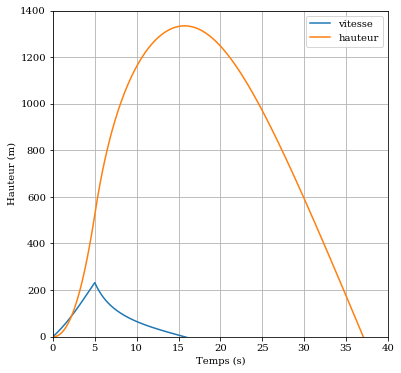

In [12]:
print(v.max())
print(numpy.where(v.max()==v)[0]*dt)
print(h.max())
print(v[50])
print(numpy.where(h.max()==h)[0]*dt)
pyplot.figure(figsize=(6,6))
pyplot.xlabel('Temps (s)')
pyplot.ylabel('Hauteur (m)')
pyplot.plot(t,v, label='vitesse')
pyplot.plot(t,h,label='hauteur')
pyplot.grid()
pyplot.legend()
pyplot.ylim((0.0,1400))
pyplot.xlim((0.0,40))

In [8]:
#computing the mass of remaining propellant at all time
mp=numpy.ones(N)*mp0
for n in range(1,N):
    mp[n]=mp[n-1]-mp_rate[n-1]*dt     
print(mp_rate)

[20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

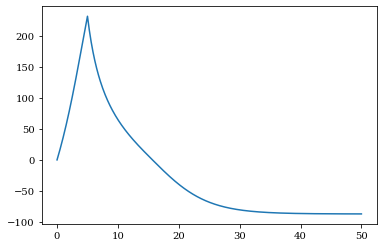

In [17]:
#implementing the euler method for finding speed
v=numpy.zeros(N)
for n in range(1,N):
    v[n]=v[n-1]+dt*(-g+mp_rate[n-1]*ve/(ms+mp[n-1])-rho*v[n-1]*numpy.sqrt(v[n-1]**2)*A*Cd/(2*(ms+mp[n-1])))
pyplot.plot(t,v)

In [18]:
#finding the height
h=numpy.zeros(N)
for n in range(1,N):
    h[n]=v[n-1]*dt+h[n-1]
    if h[n]<=0 and n!=1:
        print (n)
        break
print(h)

371
[ 0.00000000e+00  0.00000000e+00  3.35233333e-01  1.01150706e+00
  2.03468495e+00  3.41068452e+00  5.14547367e+00  7.24506708e+00
  9.71552207e+00  1.25629343e+01  1.57934327e+01  1.94131745e+01
  2.34283390e+01  2.78451219e+01  3.26697279e+01  3.79083639e+01
  4.35672306e+01  4.96525143e+01  5.61703779e+01  6.31269505e+01
  7.05283175e+01  7.83805089e+01  8.66894876e+01  9.54611366e+01
  1.04701245e+02  1.14415495e+02  1.24609443e+02  1.35288510e+02
  1.46457956e+02  1.58122870e+02  1.70288146e+02  1.82958465e+02
  1.96138274e+02  2.09831762e+02  2.24042843e+02  2.38775125e+02
  2.54031891e+02  2.69816071e+02  2.86130214e+02  3.02976463e+02
  3.20356529e+02  3.38271657e+02  3.56722598e+02  3.75709582e+02
  3.95232285e+02  4.15289797e+02  4.35880595e+02  4.57002505e+02
  4.78652678e+02  5.00827555e+02  5.23522834e+02  5.46733448e+02
  5.69153526e+02  5.90829433e+02  6.11803347e+02  6.32113749e+02
  6.51795847e+02  6.70881937e+02  6.89401719e+02  7.07382563e+02
  7.24849756e+02  7.4

In [19]:
def info(t):
    n=int(t/dt)
    print('masse',mp[n])
    print('vitesse', v[n])
    print('hauteur',h[n])
    

In [20]:

print(h.max())
print(numpy.where(h==0)[0]*dt)
print(h[33])
print(v.max())

1334.1829454303067
[ 0.   0.1 37.2 37.3 37.4 37.5 37.6 37.7 37.8 37.9 38.  38.1 38.2 38.3
 38.4 38.5 38.6 38.7 38.8 38.9 39.  39.1 39.2 39.3 39.4 39.5 39.6 39.7
 39.8 39.9 40.  40.1 40.2 40.3 40.4 40.5 40.6 40.7 40.8 40.9 41.  41.1
 41.2 41.3 41.4 41.5 41.6 41.7 41.8 41.9 42.  42.1 42.2 42.3 42.4 42.5
 42.6 42.7 42.8 42.9 43.  43.1 43.2 43.3 43.4 43.5 43.6 43.7 43.8 43.9
 44.  44.1 44.2 44.3 44.4 44.5 44.6 44.7 44.8 44.9 45.  45.1 45.2 45.3
 45.4 45.5 45.6 45.7 45.8 45.9 46.  46.1 46.2 46.3 46.4 46.5 46.6 46.7
 46.8 46.9 47.  47.1 47.2 47.3 47.4 47.5 47.6 47.7 47.8 47.9 48.  48.1
 48.2 48.3 48.4 48.5 48.6 48.7 48.8 48.9 49.  49.1 49.2 49.3 49.4 49.5
 49.6 49.7 49.8 49.9 50. ]
209.83176219711078
232.1061334126179


## Derivation of the rocket equations

In case you are kind of confused about the rocket equations, here we show how to get to them. 

Newton's second law states that the acceleration of the vehicle times its mass is equal to all the forces acting on it. Therefore,

\begin{equation}
(m_s + m_p)\frac{d\bf{v}}{dt}=\sum {\bf F}.
\end{equation}
In the above formula we have assumed that the propellant inside the rocket and the rocket move at the same velocity (in other words, their relative velocity is negligible). 

Two of the external forces acting on the rocket are,

\begin{align}
{\bf F}_g&= (m_s+m_p)\bf{g} \quad (\rm{Gravity}),\\
{\bf F}_d&= - \frac{1}{2} \rho_a \mathbf{v} |\mathbf{v}| A  C_D \quad (\rm{Drag}).
\end{align}

We also need to consider the force resulting from the ejection of the propellant. During an interval $dt$, the engine of the rocket ejects downwards a mass of propellant given by $\dot m_p dt$. Relative to the rocket, the speed of the ejected burning gas is assumed constant and equal to $v_e$ (the exhaust speed). The momentum variation induced on the exhaust gas by the engine during that interval is therefore, $d{\bf p}_{gas} = \dot m_p {\bf v}_e dt$. Again using Newton's second law we conclude that the force applied by the rocket on the gas is,

\begin{align}
{\bf F}_{rocket\rightarrow gas} = \frac{d{\bf p}_{gas}}{dt} = \dot m_p {\bf v}_e
\end{align}

Using Newton's third law (|action| = |reaction|), the force exerted by the exhaust gas on the rocket is then,

\begin{align}
{\bf F}_{gas\rightarrow rocket} = -{\bf F}_{rocket\rightarrow gas} = -\dot m_p {\bf v}_e
\end{align}

If we collect all the forces acting on the rocket we finally have:

\begin{align}
(m_s + m_p)\frac{d\bf{v}}{dt}=(m_s+m_p){\bf g}- \frac{1}{2} \rho_a \mathbf{v} |v| A  C_D -\dot m_p {\bf v}_e
\end{align}



---

###### The cell below loads the style of the notebook.

In [1]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())